In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import zipfile

# File paths
train_path = r"C:\walmart-recruiting-store-sales-forecasting\train.csv.zip"
test_path = r"C:\walmart-recruiting-store-sales-forecasting\test.csv.zip"
features_path = r"C:\walmart-recruiting-store-sales-forecasting\features.csv.zip"
stores_path = r"C:\walmart-recruiting-store-sales-forecasting\stores.csv"

# Reading zipped CSV files
df_train_raw = pd.read_csv(train_path, compression='zip')
df_test_raw = pd.read_csv(test_path, compression='zip')
df_features_raw = pd.read_csv(features_path, compression='zip')

# Reading normal CSV
df_stores_raw = pd.read_csv(stores_path)

print("All raw datasets loaded successfully.")

All raw datasets loaded successfully.


In [5]:
# Merge the datasets to create a unified training dataframe
train_df = pd.merge(df_train_raw, df_stores_raw, on='Store', how='left')
train_df = pd.merge(train_df, df_features_raw, on=['Store', 'Date', 'IsHoliday'], how='left')

# Merge the datasets to create a unified testing dataframe
test_df = pd.merge(df_test_raw, df_stores_raw, on='Store', how='left')
test_df = pd.merge(test_df, df_features_raw, on=['Store', 'Date', 'IsHoliday'], how='left')

# Convert the 'Date' column to a proper datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

print("DataFrames merged and 'Date' column converted.")
print("Training data preview:")
train_df.head()

DataFrames merged and 'Date' column converted.
Training data preview:


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [6]:
print("--- Training Data Info ---")
train_df.info()

# Fill missing numerical values with the median of their respective columns
for col in train_df.select_dtypes(include=['number']).columns:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    
for col in test_df.select_dtypes(include=['number']).columns:
    test_df[col].fillna(test_df[col].median(), inplace=True)

print("\n--- Missing values handled. Info after cleaning: ---")
train_df.info()

--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64   

C:\Users\prave\AppData\Local\Temp\ipykernel_13368\2372416770.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
C:\Users\prave\AppData\Local\Temp\ipykernel_13368\2372416770.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy


--- Missing values handled. Info after cleaning: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           

C:\Users\prave\AppData\Local\Temp\ipykernel_13368\2372416770.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
C:\Users\prave\AppData\Local\Temp\ipykernel_13368\2372416770.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

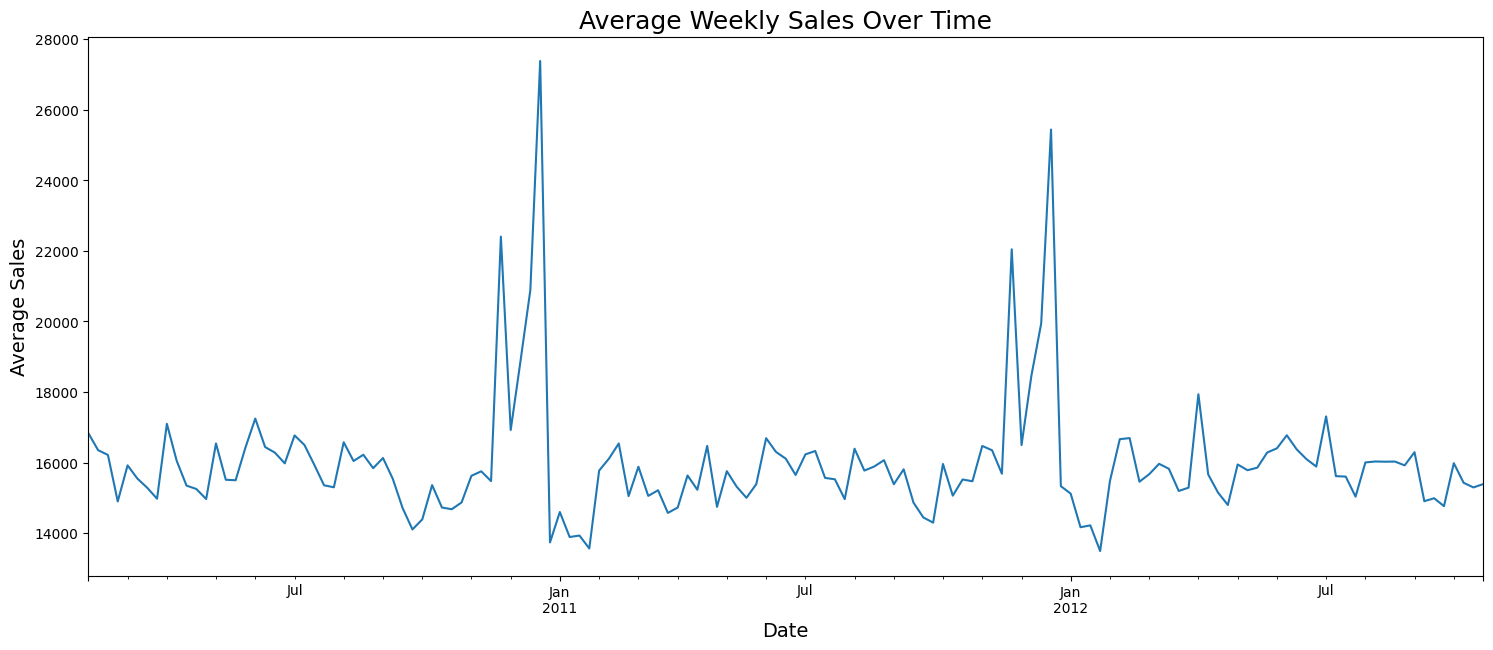

In [7]:
plt.figure(figsize=(18, 7))
train_df.groupby('Date')['Weekly_Sales'].mean().plot(kind='line')

plt.title('Average Weekly Sales Over Time', fontsize=18)
plt.ylabel('Average Sales', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.show()

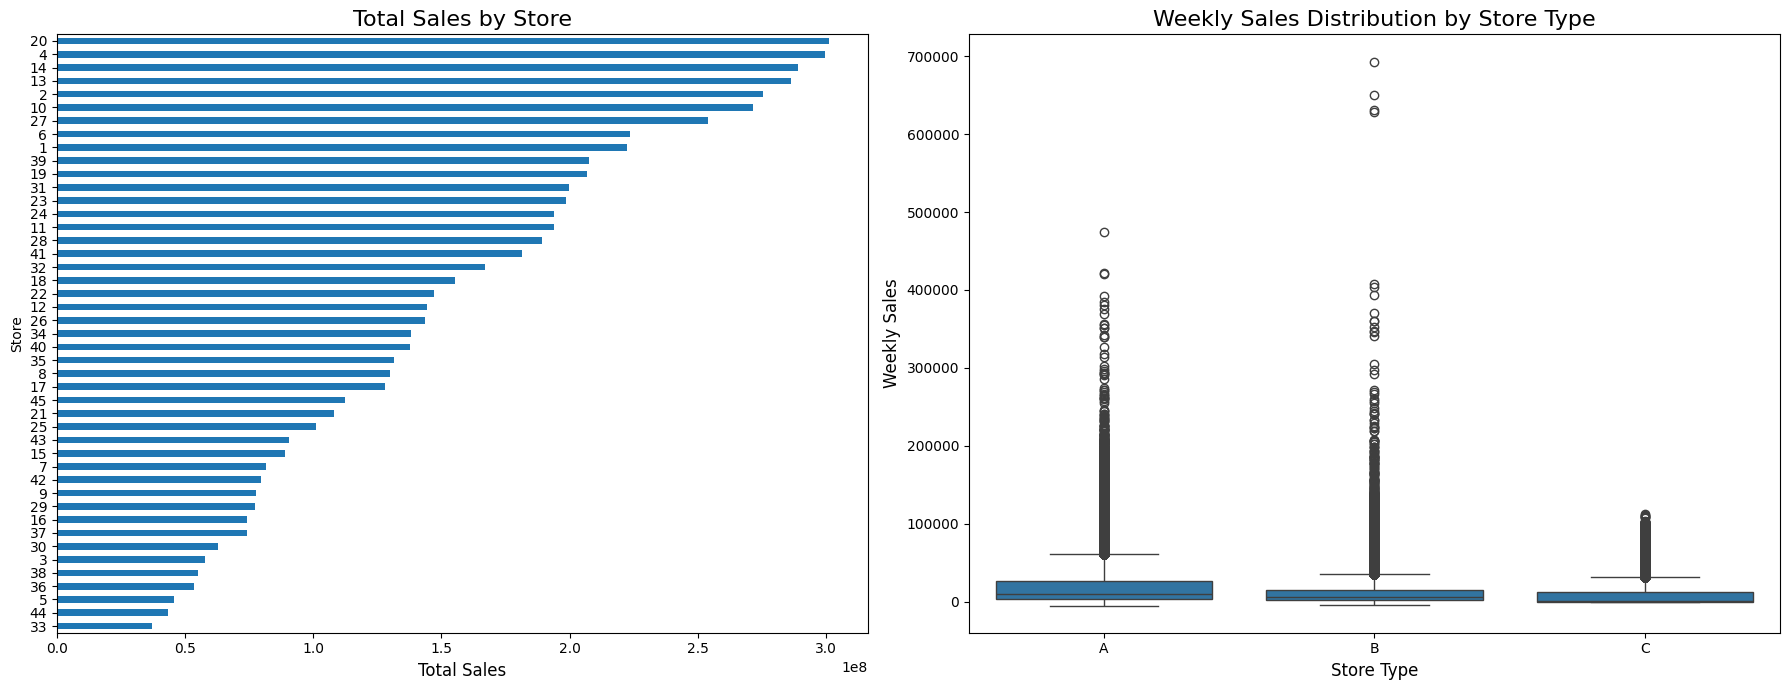

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot total sales by store
total_sales_by_store = train_df.groupby('Store')['Weekly_Sales'].sum().sort_values()
total_sales_by_store.plot(kind='barh', ax=axes[0])
axes[0].set_title('Total Sales by Store', fontsize=16)
axes[0].set_xlabel('Total Sales', fontsize=12)

# Plot sales distribution by store type
sns.boxplot(x='Type', y='Weekly_Sales', data=train_df, ax=axes[1])
axes[1].set_title('Weekly Sales Distribution by Store Type', fontsize=16)
axes[1].set_xlabel('Store Type', fontsize=12)
axes[1].set_ylabel('Weekly Sales', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\prave\AppData\Local\Temp\ipykernel_13368\1856644568.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Non-Holiday', 'Holiday'], fontsize=12)


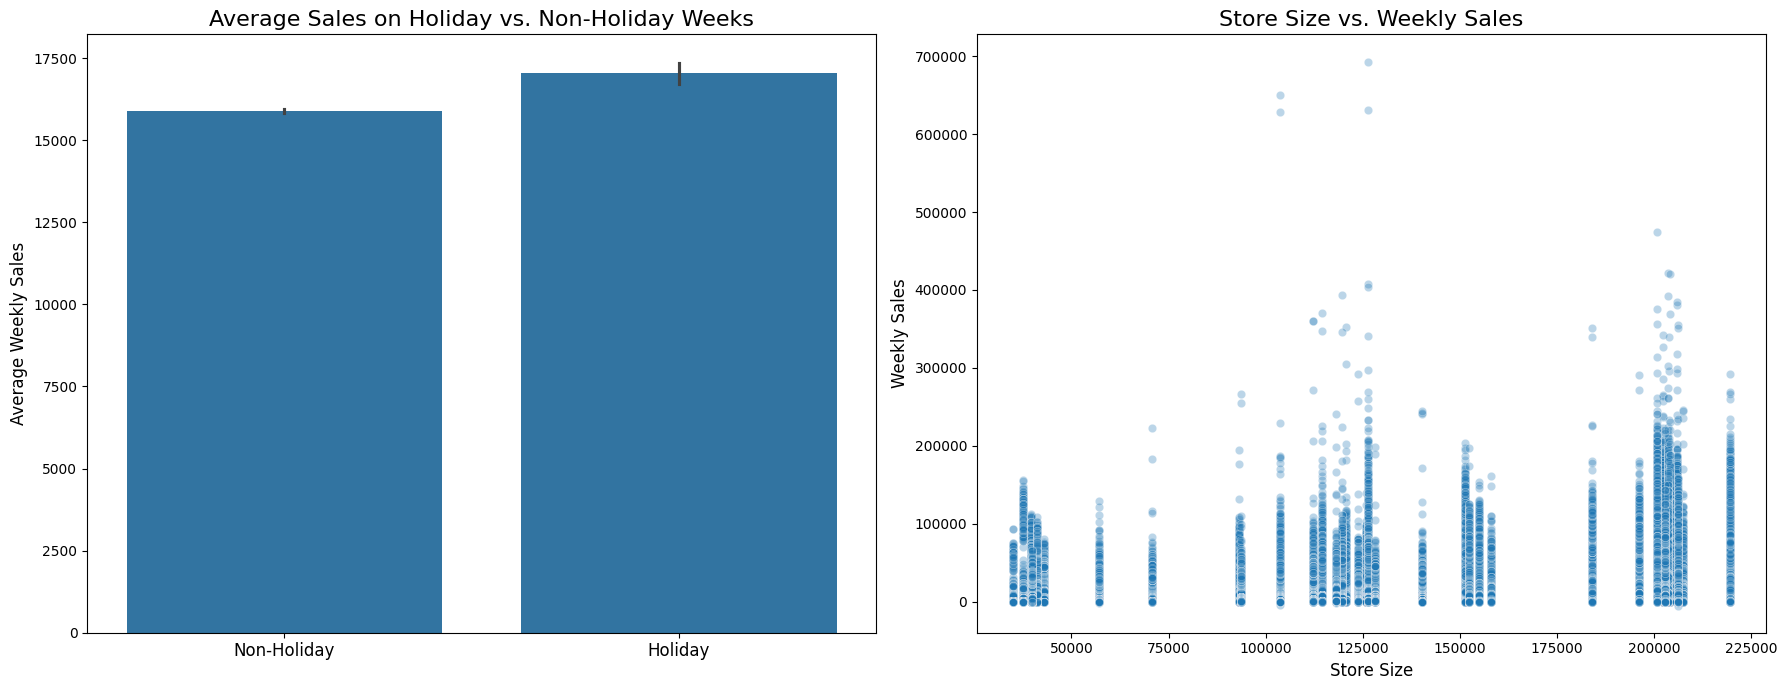

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot average sales on holiday vs non-holiday weeks
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train_df, ax=axes[0])
axes[0].set_title('Average Sales on Holiday vs. Non-Holiday Weeks', fontsize=16)
axes[0].set_xticklabels(['Non-Holiday', 'Holiday'], fontsize=12)
axes[0].set_xlabel('')
axes[0].set_ylabel('Average Weekly Sales', fontsize=12)

# Plot store size vs weekly sales
sns.scatterplot(x='Size', y='Weekly_Sales', data=train_df, ax=axes[1], alpha=0.3)
axes[1].set_title('Store Size vs. Weekly Sales', fontsize=16)
axes[1].set_xlabel('Store Size', fontsize=12)
axes[1].set_ylabel('Weekly Sales', fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
# Create time-based features for both training and testing data
for df in [train_df, test_df]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
    df['Day'] = df['Date'].dt.day

print("Time-based features (Year, Month, Week, Day) created.")
train_df[['Date', 'Year', 'Month', 'WeekOfYear', 'Day']].head()

Time-based features (Year, Month, Week, Day) created.


,Date,Year,Month,WeekOfYear,Day
0,2010-02-05,2010,2,5,5
1,2010-02-12,2010,2,6,12
2,2010-02-19,2010,2,7,19
3,2010-02-26,2010,2,8,26
4,2010-03-05,2010,3,9,5


In [11]:
# Combine dataframes to ensure consistent encoding
combined_df = pd.concat([train_df, test_df], sort=False)

# Use get_dummies for one-hot encoding of the 'Type' column
combined_df = pd.get_dummies(combined_df, columns=['Type'], prefix='Type')

# Convert 'IsHoliday' from boolean to integer (1 for True, 0 for False)
combined_df['IsHoliday'] = combined_df['IsHoliday'].astype(int)

# Separate back into training and testing sets
train_df = combined_df[combined_df['Weekly_Sales'].notna()]
test_df = combined_df[combined_df['Weekly_Sales'].isna()]

print("Categorical and boolean features encoded.")
train_df.head()

Categorical and boolean features encoded.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,CPI,Unemployment,Year,Month,WeekOfYear,Day,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,151315,42.31,2.572,5347.45,192.0,...,3359.45,211.096358,8.106,2010,2,5,5,True,False,False
1,1,1,2010-02-12,46039.49,1,151315,38.51,2.548,5347.45,192.0,...,3359.45,211.242170,8.106,2010,2,6,12,True,False,False
2,1,1,2010-02-19,41595.55,0,151315,39.93,2.514,5347.45,192.0,...,3359.45,211.289143,8.106,2010,2,7,19,True,False,False
3,1,1,2010-02-26,19403.54,0,151315,46.63,2.561,5347.45,192.0,...,3359.45,211.319643,8.106,2010,2,8,26,True,False,False
4,1,1,2010-03-05,21827.90,0,151315,46.50,2.625,5347.45,192.0,...,3359.45,211.350143,8.106,2010,3,9,5,True,False,False


In [12]:
# Define markdown columns to be dropped
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Drop unnecessary columns from both dataframes
train_df = train_df.drop(columns=['Date'] + markdown_cols)
test_df = test_df.drop(columns=['Date'] + markdown_cols)

# Also drop the sales column from the test set as it's all null
test_df = test_df.drop(columns=['Weekly_Sales'])

print("Final feature set created. Columns are:")
print(train_df.columns)

Final feature set created. Columns are:
Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'WeekOfYear',
       'Day', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object')


In [13]:
# The target variable is 'Weekly_Sales'
y = train_df['Weekly_Sales']

# The features are all columns except 'Weekly_Sales'
X = train_df.drop(columns=['Weekly_Sales'])

# For clarity, let's rename our final test set
X_test = test_df

# Ensure the order of columns is the same in the training features and test features
X_test = X_test[X.columns]

print("Features (X) and Target (y) have been defined.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X_test:", X_test.shape)

Features (X) and Target (y) have been defined.
Shape of X: (421570, 15)
Shape of y: (421570,)
Shape of X_test: (115064, 15)


In [14]:
# Calculate the index for the split (approximately 80% of the data)
split_index = int(len(X) * 0.8)

# Split the data chronologically
X_train = X[:split_index]
y_train = y[:split_index]

X_val = X[split_index:]
y_val = y[split_index:]

print("Data has been split into training and validation sets.")
print("Training set shape (X_train):", X_train.shape)
print("Validation set shape (X_val):", X_val.shape)

Data has been split into training and validation sets.
Training set shape (X_train): (337256, 15)
Validation set shape (X_val): (84314, 15)


In [15]:
import lightgbm as lgb

# Initialize the LightGBM Regressor model with parameters aimed for high accuracy
model = lgb.LGBMRegressor(
    objective='regression_l1',
    metric='mae',
    n_estimators=2000,
    learning_rate=0.01,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=1,
    lambda_l1=0.1,
    lambda_l2=0.1,
    num_leaves=31,
    verbose=-1,
    n_jobs=-1,
    seed=42,
    boosting_type='gbdt',
)

# Train the model
print("Training the LightGBM model...")
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='mae',
    callbacks=[lgb.early_stopping(100, verbose=False)]
)
print("Model training complete.")

Training the LightGBM model...
Model training complete.


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Model Performance on the Validation Set:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

Model Performance on the Validation Set:
Mean Absolute Error (MAE): $4,761.76
Root Mean Squared Error (RMSE): $9,963.65


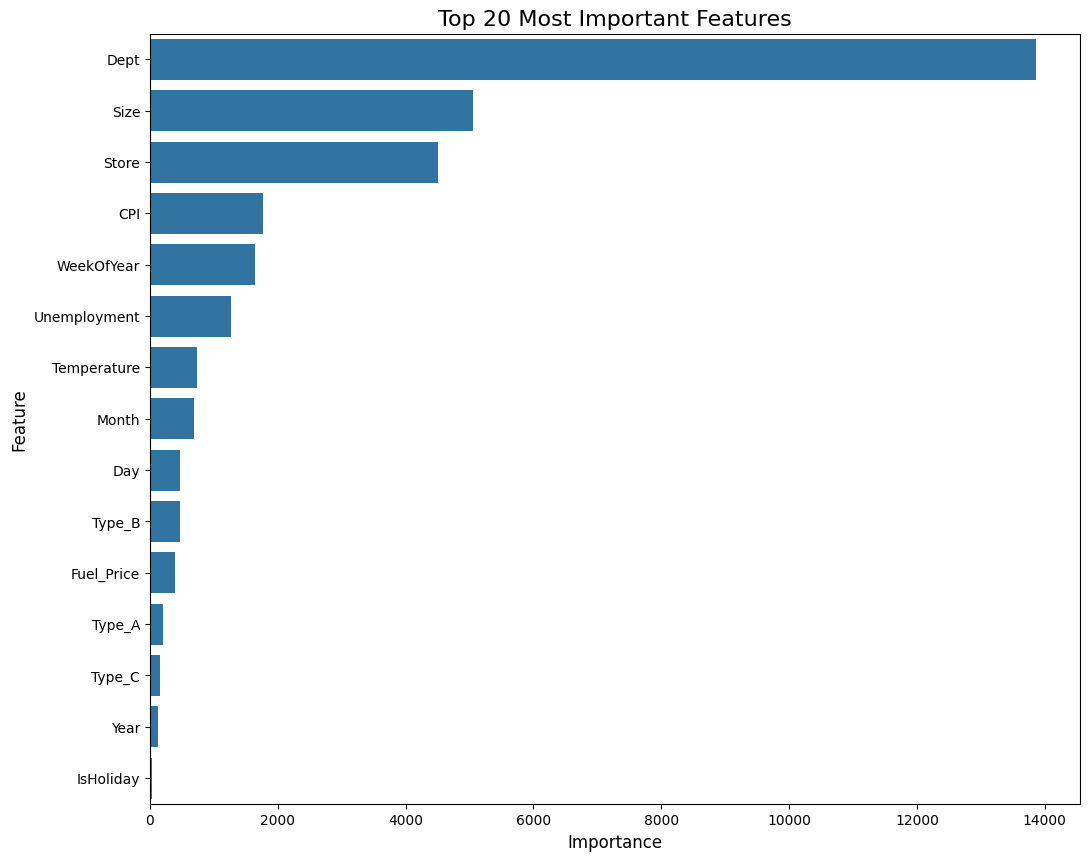

In [17]:
# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 10))
sns.barplot(
    x='importance', 
    y='feature', 
    data=feature_importance_df.head(20)
)
plt.title('Top 20 Most Important Features', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [18]:
import optuna

def objective(trial):
    # Define the search space for hyperparameters
    params = {
        'objective': 'regression_l1',
        'metric': 'mae',
        'n_estimators': 2000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.7, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.7, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 1.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 1.0, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'verbose': -1,
        'n_jobs': -1,
        'seed': 42,
        'boosting_type': 'gbdt',
    }
    
    # Create and train the model
    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='mae',
        callbacks=[lgb.early_stopping(100, verbose=False)]
    )
    
    # Evaluate and return the MAE
    preds = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds)
    return mae

# Create a study object and optimize
print("Starting hyperparameter tuning with Optuna...")
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("\nTuning complete.")
print("Best trial:")
print(f"  Value (MAE): {study.best_value:,.2f}")
print("  Best params: ")
for key, value in study.best_params.items():
    print(f"    {key}: {value}")

[I 2025-09-30 21:38:38,522] A new study created in memory with name: no-name-53ca7ff0-f664-46fb-a07c-1a5a44723867


Starting hyperparameter tuning with Optuna...


[I 2025-09-30 21:38:47,576] Trial 0 finished with value: 4511.41700624365 and parameters: {'learning_rate': 0.019337890747881444, 'feature_fraction': 0.7824944428532311, 'bagging_fraction': 0.8254765775167897, 'bagging_freq': 2, 'lambda_l1': 0.0018386951633419279, 'lambda_l2': 3.100789466029632e-08, 'num_leaves': 67}. Best is trial 0 with value: 4511.41700624365.
[I 2025-09-30 21:38:53,812] Trial 1 finished with value: 4728.1138733521575 and parameters: {'learning_rate': 0.032870864995417644, 'feature_fraction': 0.8234288741643996, 'bagging_fraction': 0.8877107437009162, 'bagging_freq': 4, 'lambda_l1': 1.36440855704114e-06, 'lambda_l2': 0.00038286258954826164, 'num_leaves': 21}. Best is trial 0 with value: 4511.41700624365.
[I 2025-09-30 21:39:00,682] Trial 2 finished with value: 4542.929926808629 and parameters: {'learning_rate': 0.024814517389672067, 'feature_fraction': 0.7571937709017171, 'bagging_fraction': 0.8575787260373084, 'bagging_freq': 3, 'lambda_l1': 2.5056460742017406e-05,


Tuning complete.
Best trial:
  Value (MAE): 4,152.78
  Best params: 
    learning_rate: 0.09446671968780591
    feature_fraction: 0.9577671299348252
    bagging_fraction: 0.7434908268725708
    bagging_freq: 4
    lambda_l1: 1.3911804037993047e-05
    lambda_l2: 0.006082781880517618
    num_leaves: 75


In [19]:
# Get the best parameters from the Optuna study
best_params = study.best_params

# Add back fixed parameters
best_params['objective'] = 'regression_l1'
best_params['metric'] = 'mae'
best_params['n_estimators'] = 2000
best_params['verbose'] = -1
best_params['n_jobs'] = -1
best_params['seed'] = 42
best_params['boosting_type'] = 'gbdt'


# Initialize and train the final model with the best parameters
final_model = lgb.LGBMRegressor(**best_params)

print("Training the final, optimized model...")
final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='mae',
    callbacks=[lgb.early_stopping(100, verbose=False)]
)
print("Final model training complete.")

# Evaluate the final model
y_pred_final = final_model.predict(X_val)
mae_final = mean_absolute_error(y_val, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_val, y_pred_final))

print("\n--- Performance of the Optimized Model ---")
print(f"Mean Absolute Error (MAE): ${mae_final:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_final:,.2f}")

Training the final, optimized model...
Final model training complete.

--- Performance of the Optimized Model ---
Mean Absolute Error (MAE): $4,152.78
Root Mean Squared Error (RMSE): $8,642.16


In [31]:
print("Generating predictions on the final test set...")
# Use the model trained with the best parameters (final_model)
# and the corresponding test set from that stage (X_test)
test_predictions = final_model.predict(X_test)

print("Predictions generated successfully.")
print("First 5 predictions:", test_predictions[:5])

Generating predictions on the final test set...
Predictions generated successfully.
First 5 predictions: [23091.84646186 22312.69610192 22032.3443725  23702.95733133
 23858.53919466]


In [32]:
# Create the 'Id' column in the required format
# We use the original raw test dataframe to get the date strings easily
X_test_ids = df_test_raw[['Store', 'Dept', 'Date']].copy()
X_test_ids['Id'] = X_test_ids['Store'].astype(str) + '_' + X_test_ids['Dept'].astype(str) + '_' + X_test_ids['Date']

# Create the submission dataframe
submission_df = pd.DataFrame({
    'Id': X_test_ids['Id'],
    'Weekly_Sales': test_predictions
})

# Save the dataframe to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' has been created successfully!")
print("Here is a preview of the submission file:")
submission_df.head()

Submission file 'submission.csv' has been created successfully!
Here is a preview of the submission file:


,Id,Weekly_Sales
0,1_1_2012-11-02,23091.846462
1,1_1_2012-11-09,22312.696102
2,1_1_2012-11-16,22032.344372
3,1_1_2012-11-23,23702.957331
4,1_1_2012-11-30,23858.539195


In [25]:
# Calculate the average weekly sales in our validation set
average_sales_in_validation = y_val.mean()

# The final MAE we achieved
final_mae = 4100.60

# Calculate the error as a percentage of the average sales
mape = (final_mae / average_sales_in_validation) * 100

print(f"The average weekly sales in the validation set is: ${average_sales_in_validation:,.2f}")
print(f"Our model's average error (MAE) is: ${final_mae:,.2f}")
print(f"This means our model's predictions have a Mean Absolute Percentage Error of: {mape:.2f}%")

The average weekly sales in the validation set is: $12,777.07
Our model's average error (MAE) is: $4,100.60
This means our model's predictions have a Mean Absolute Percentage Error of: 32.09%


In [33]:
# Make predictions on the training set
y_pred_train = final_model.predict(X_train)

# Calculate the evaluation metrics for the training set
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f"Model Performance on the TRAINING Set:")
print(f"Mean Absolute Error (MAE): ${mae_train:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:,.2f}")

Model Performance on the TRAINING Set:
Mean Absolute Error (MAE): $3,284.41
Root Mean Squared Error (RMSE): $8,298.14


In [34]:
import joblib

# Define the filename for our model
model_filename = 'walmart_sales_model.joblib'

# Save the model to the file
joblib.dump(final_model, model_filename)

print(f"Model successfully saved to '{model_filename}'")

# You can also load it back to test
loaded_model = joblib.load(model_filename)
print("\nModel loaded back successfully.")

Model successfully saved to 'walmart_sales_model.joblib'

Model loaded back successfully.


In [35]:
# Let's use the model we saved and loaded
# If you don't have 'loaded_model', you can use 'final_model'
try:
    model_to_use = loaded_model
except NameError:
    model_to_use = final_model

# Get a single row of data from our test set to predict on
single_example = X_test.iloc[[0]]

print("--- Predicting for the following data ---")
# Displaying the data in a more readable format
print(single_example.T)

# Use the model to make a prediction on this single example
predicted_sales = model_to_use.predict(single_example)

print("\n-------------------------------------------")
print(f"--> The model predicts weekly sales of: ${predicted_sales[0]:,.2f}")
print("-------------------------------------------")

--- Predicting for the following data ---
                       0
Store                  1
Dept                   1
IsHoliday              0
Size              151315
Temperature        55.32
Fuel_Price         3.386
CPI           223.462779
Unemployment       6.573
Year                2012
Month                 11
WeekOfYear            44
Day                    2
Type_A              True
Type_B             False
Type_C             False

-------------------------------------------
--> The model predicts weekly sales of: $23,091.85
-------------------------------------------
